In [1]:
from sklearn.datasets import load_iris

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [83]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#df['species'] = iris.target


In [84]:
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [86]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [87]:
df.duplicated().sum()

1

In [88]:
#set the models by usin pipe
pip=make_pipeline(StandardScaler(),LogisticRegression())


In [89]:
#split the data to x_trine , Y_traine
X,y=load_iris(return_X_y=True)
X_train,X_test,Y_train,Y_test=train_test_split(X, y, random_state=42)

In [90]:
pip.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [91]:
accuracy_score(pip.predict(X_test), Y_test)

1.0

In [92]:
result = cross_validate(pip, X, y)

In [93]:
result['test_score']

array([0.96666667, 1.        , 0.93333333, 0.9       , 1.        ])

In [94]:
lr=LogisticRegression()
result = cross_validate(pip, X, y)

In [95]:
result['test_score']

array([0.96666667, 1.        , 0.93333333, 0.9       , 1.        ])

In [96]:
param_distributions = {'n_estimators': randint(1, 8),
                       'max_depth': randint(8, 20)}

In [97]:
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                            n_iter=10,
                            param_distributions=param_distributions,
                            random_state=42)

In [98]:
search.fit(X_train, Y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022158058730>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022157FD6610>},
                   random_state=42)

In [99]:
search.best_params_

{'max_depth': 18, 'n_estimators': 5}

In [100]:
search.score(X_test, Y_test)

1.0

In [102]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


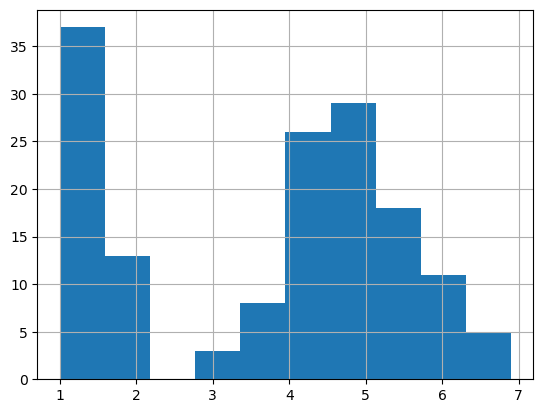

In [104]:
df['petal length (cm)'].hist()
plt.show()